# Python / Numpy

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

KeyboardInterrupt: 

In [4]:
# Create an array of 100 random numbers using the Numpy rand function.
randomArray = np.random.rand(100)

#Compute mean
def computeMean(array):
    mean = np.sum(array) / len(array)
    return mean
randomMean = computeMean(randomArray)
print("The mean is: ", randomMean)

#Compute Std. dev
def computeStdDeviation(array):
    mean = computeMean(array)
    total = np.power(array - mean, 2)
    std = np.sqrt(np.sum(total / len(array)))
    return std
randomStd = computeStdDeviation(randomArray)
print("The Std. dev is: ", randomStd)

The mean is:  0.4784255539589093
The Std. dev is:  0.3049830170059848


In [6]:
# Verify that your mean/std deviation functions work correctly:
print("my mean is: ", computeMean(randomArray))
print("numpy mean is: ", np.mean(randomArray))
print("my std deviation is: ", computeStdDeviation(randomArray))
print("numpy std deviation is: ", np.std(randomArray))

my mean is:  0.4784255539589093
numpy mean is:  0.4784255539589093
my std deviation is:  0.3049830170059848
numpy std deviation is:  0.3049830170059848


In [14]:
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0
sigma = 1
sample_size = 10000

# Generate samples from the normal distribution
samples = norm.rvs(loc=mu, scale=sigma, size=sample_size)

# Compute mean and standard deviation using custom functions
mean_custom = computeMean(samples)
std_dev_custom = computeStdDeviation(samples)

# Compute mean and standard deviation using NumPy
mean_numpy = np.mean(samples)
std_dev_numpy = np.std(samples)

print(f"Custom mean: {mean_custom}, Custom std dev: {std_dev_custom}")
print(f"NumPy mean: {mean_numpy}, NumPy std dev: {std_dev_numpy}")


Custom mean: -0.005200398844776488, Custom std dev: 1.006598625340758
NumPy mean: -0.005200398844776488, NumPy std dev: 1.0065986253407577


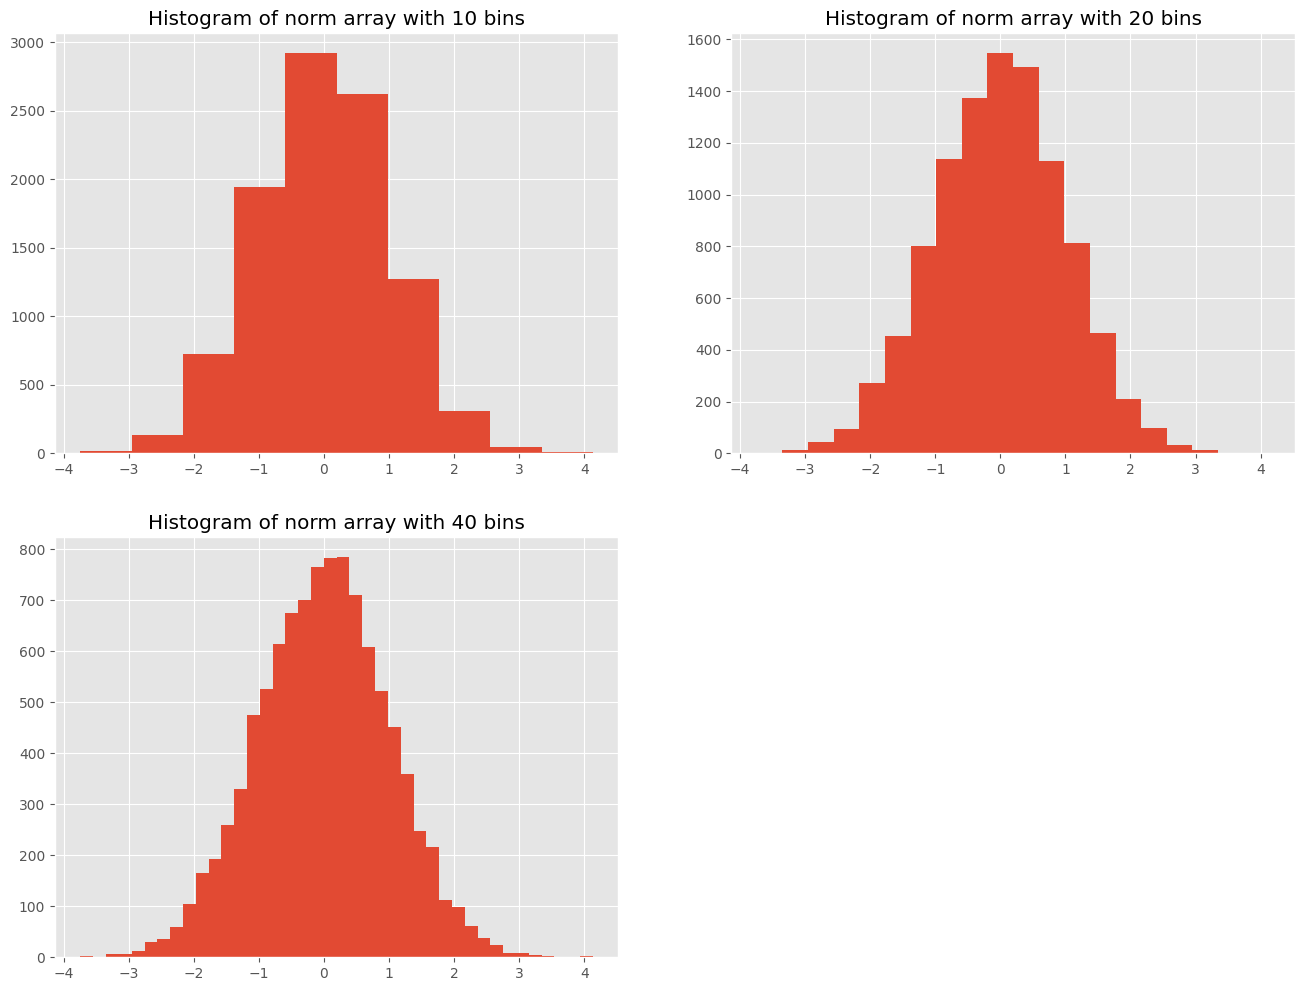

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.figure(figsize=(16, 12))
# create a subplot in a 2 by 2 grid, return the subplot at position 1
# these subplots are often called "axes"
sub_fig_1 = fig.add_subplot( 2,2,1 ) # 1-based counting
sub_fig_1.set_title("Histogram of norm array with 10 bins")
sub_fig_2 = fig.add_subplot( 2,2,2 )
sub_fig_2.set_title("Histogram of norm array with 20 bins")
sub_fig_3 = fig.add_subplot( 2,2,3 )
sub_fig_3.set_title("Histogram of norm array with 40 bins")
sub_fig_1.hist(samples, 10)
sub_fig_2.hist(samples, 20)
sub_fig_3.hist(samples, 40)
plt.show()

# Data Exploration / Analysis

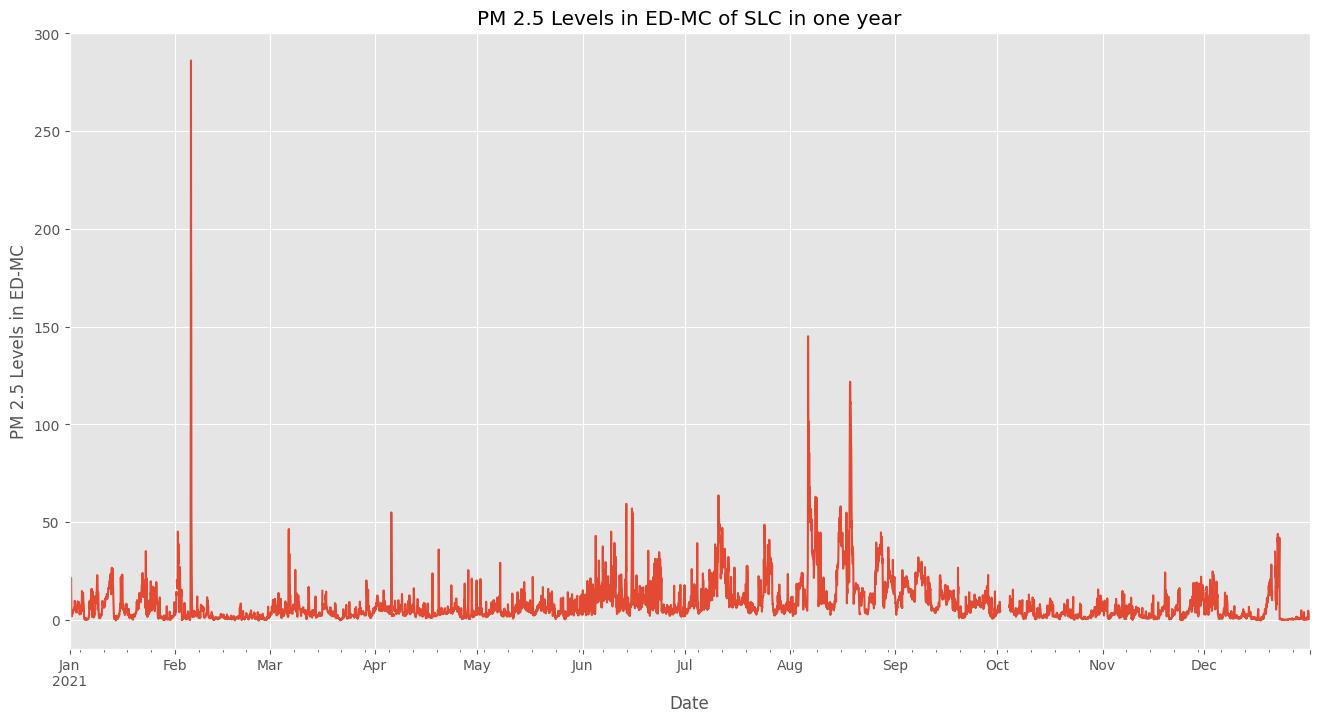

In [16]:
# Plot the readings from that station over the course of a year
dataFrame = pd.read_csv("2021-PM2.5.csv")
dataFrame = dataFrame[['Date', 'ED-MC']]
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])
dataFrame.set_index('Date', inplace=True)

plt.figure(figsize=(16, 8))  
dataFrame['ED-MC'].plot()
plt.xlabel('Date')
plt.ylabel('PM 2.5 Levels in ED-MC')
plt.title('PM 2.5 Levels in ED-MC of SLC in one year')

plt.show()

          ED-MC
Date           
1      6.933962
2      4.330551
3      4.519515
4      4.746732
5      5.061186
6     10.542083
7     12.696226
8     22.132070
9     10.610987
10     3.722467
11     4.914345
12     4.577379


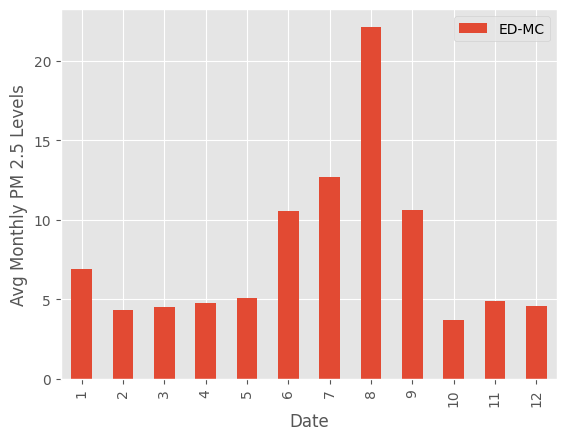

In [17]:
# Plot the mean pm2.5 level for each month using a bar chart. 
monthAvgs = dataFrame.groupby(dataFrame.index.month).mean()
print(monthAvgs)
monthAvgs.plot(kind="bar")
plt.ylabel('Avg Monthly PM 2.5 Levels')
plt.show()

Insights: 
The average PM2.5 level is generally higher during summer seasons, with a peak appearing in August, while the average levels for other
seasons are comparably lower. This high positive correlation with temperature may be a proof of the climates impact on air quality. SLC is a typical dry-summer continental climate, where it is extremely dry and usually windless in the summer. Less rain will result to the PM2.5 molecules in the air not being covered and taken away with the rain, and less wind will slower the process of dillute the PM2.5 density.

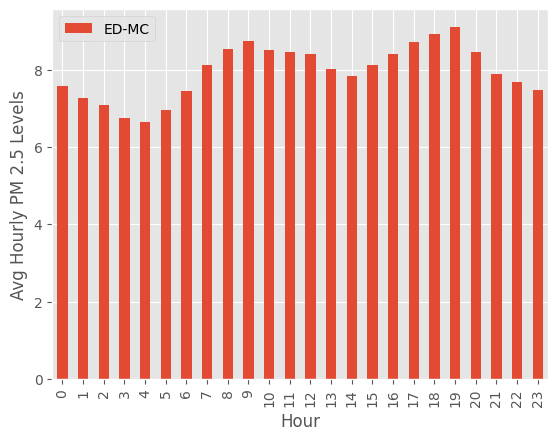

In [18]:
# group the data by time of day (by hour), and plot the mean pollution level for each hour
hourAvgs = dataFrame.groupby(dataFrame.index.hour).mean()
hourAvgs.plot(kind="bar")
plt.ylabel('Avg Hourly PM 2.5 Levels')
plt.xlabel('Hour')
plt.show()

Insights:
The hourly PM2.5 level is typically higher during day time, specifically during hours with high human actions, with two peaks appearing
at 9:00 and 18:00. These are the typical 'go to work hour' and 'off work hour' and is therefore rush hour for traffic. This plot indicates that
PM2.5 level is highly related to human activity especially highly positively related to the use of provate vehicles.

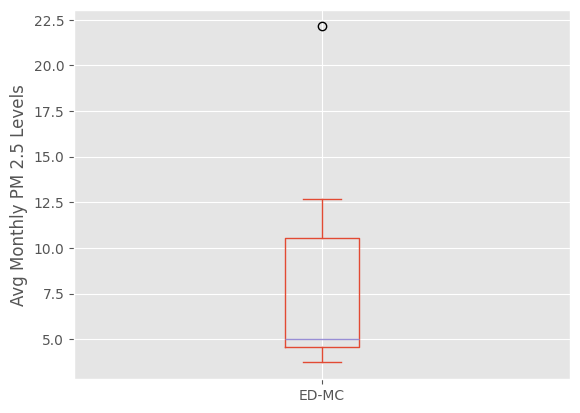

In [19]:
#Use Box and Whisker plots of the monthly data groupings to provide a more complete view of the data.
monthAvgs = dataFrame.groupby(dataFrame.index.month).mean()
monthAvgs.plot(kind="box")
plt.ylabel('Avg Monthly PM 2.5 Levels')
plt.show()

Insights:
The box and whisker plot shows that the montly PM2.5 levels are highly uneven and theres more months above the median value.

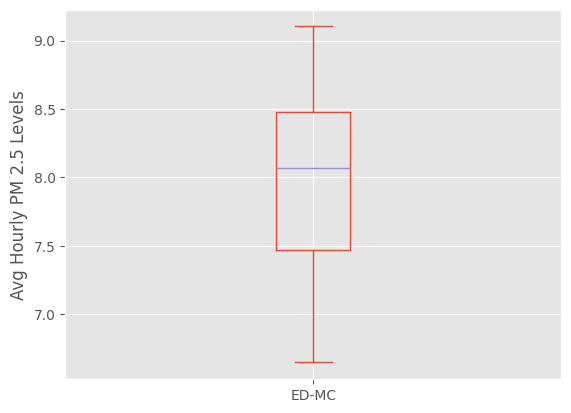

In [20]:
#Use Box and Whisker plots of the hourly data groupings to provide a more complete view of the data.
hourAvgs.plot(kind="box")
plt.ylabel('Avg Hourly PM 2.5 Levels')
plt.xlabel('')
plt.show()

Insights:
The box and whiskers plot shows the hourly PM2.5 level is evenly distributed.